# Import Packages & Load Dataset from Kaggle

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random_state = 42

import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Path to dataset files: C:\Users\naila\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


## Description of Dataset

### Classification Labels
- **Churn** — Whether the customer churned or not (`Yes` or `No`)

### Customer Services Booked
- **PhoneService** — Whether the customer has a phone service (`Yes`, `No`)
- **MultipleLines** — Whether the customer has multiple lines (`Yes`, `No`, `No phone service`)
- **InternetService** — Customer’s internet service provider (`DSL`, `Fiber optic`, `No`)
- **OnlineSecurity** — Whether the customer has online security (`Yes`, `No`, `No internet service`)
- **OnlineBackup** — Whether the customer has online backup (`Yes`, `No`, `No internet service`)
- **DeviceProtection** — Whether the customer has device protection (`Yes`, `No`, `No internet service`)
- **TechSupport** — Whether the customer has tech support (`Yes`, `No`, `No internet service`)
- **StreamingTV** — Whether the customer has streaming TV (`Yes`, `No`, `No internet service`)
- **StreamingMovies** — Whether the customer has streaming movies (`Yes`, `No`, `No internet service`)

### Customer Account Information
- **Tenure** — Number of months the customer has stayed with the company
- **Contract** — The contract term of the customer (`Month-to-month`, `One year`, `Two year`)
- **PaperlessBilling** — Whether the customer has paperless billing (`Yes`, `No`)
- **PaymentMethod** — The customer’s payment method (`Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)`)
- **MonthlyCharges** — The amount charged to the customer monthly
- **TotalCharges** — The total amount charged to the customer

### Customer Demographic Information
- **customerID** — Customer ID
- **Gender** — Whether the customer is a male or a female
- **SeniorCitizen** — Whether the customer is a senior citizen or not (`1` = Yes, `0` = No)
- **Partner** — Whether the customer has a partner or not (`Yes`, `No`)
- **Dependents** — Whether the customer has dependents or not (`Yes`, `No`)


# Exploratory Data Analysis

In [5]:
# Melihat 5 data pertama dari datset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Melihat ringkasan informasi dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# drop kolom customerID karena tidak diperlukan untuk proses prediksi
df.drop(columns=['customerID'], inplace=True)

# ubah tipe data kolom TotalCharges (object) menjadi float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Mengecek apakah ada nilai null pada kolom TotalCharges
df[df['TotalCharges'].isna()][['tenure','MonthlyCharges','TotalCharges','Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


In [9]:
# Drop nilai null pada TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
# Melihat statistik deskriptif dari data numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


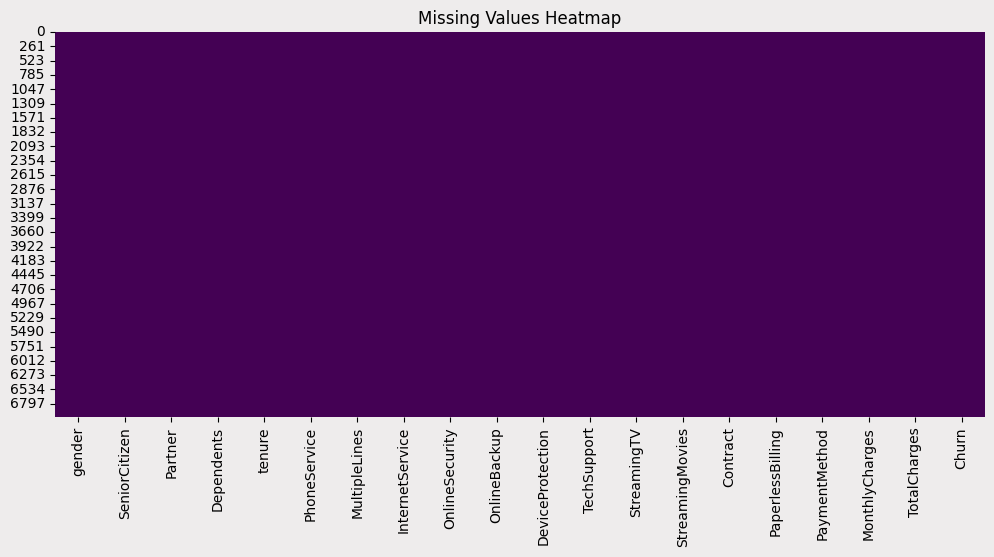

In [12]:
# Mengecek missing value secara keseluruhan dengan menampilkan heatmap missing values
plt.figure(figsize=(12, 5),facecolor='#eeecec')
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Data Preprocessing

Splitting Dataset

In [13]:
# Split dataset dengan proporsi Train dan Testnya 8:2
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn'].map({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Scaling dengan MinMaxScaler

In [15]:
# Melakukan scaling pada fitur numerik di data train menggunakan MinMaxScaler, 
# kemudian transform scaler yang sama ke data test
from sklearn.preprocessing import MinMaxScaler

num_cols = df.select_dtypes(include=['number']).columns.tolist()

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Encoding dengan OneHot Encoder

In [16]:
# Encoding data train kategorikal dengan OneHot Encoder,
# kemudian transform encoder yang sama ke data train
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

encoded_data = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=encoder.get_feature_names_out())
encoded_df


,cat__gender_Female,cat__gender_Male,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,cat__PhoneService_No,cat__PhoneService_Yes,cat__MultipleLines_No,cat__MultipleLines_No phone service,...,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.901408,0.759601,0.699279
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.352113,0.173067,0.115820
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.943662,0.716209,0.724538
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.028169,0.657357,0.024954
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.676056,0.221945,0.236782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.901408,0.524190,0.523471
5621,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.197183,0.567581,0.130239
5622,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.492958,0.743142,0.387774
5623,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.126761,0.473815,0.073996


Distribusi Kelas Churn

Churn
No     4130
Yes    1495
Name: count, dtype: int64


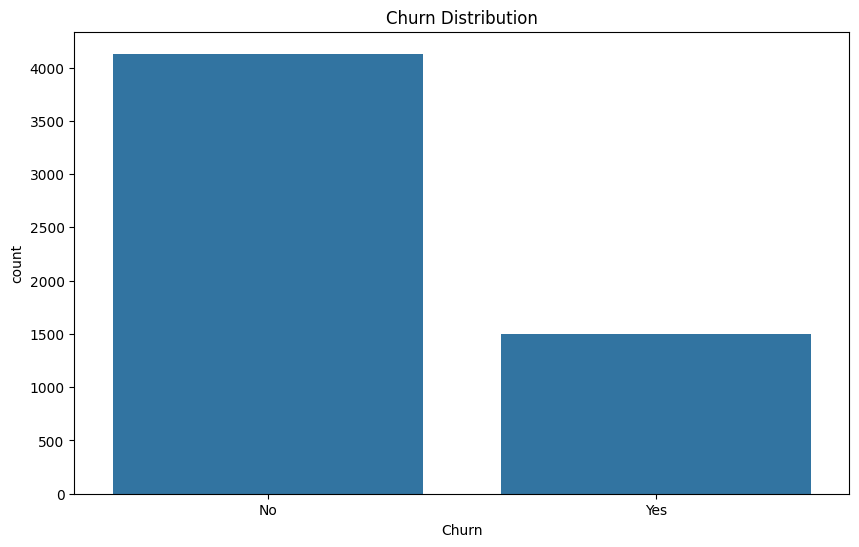

In [18]:
# Melihat distribusi class churn
final_df = pd.concat([
    y_train,
    encoded_df.reset_index(drop=True)        
], axis=1)

final_df['Churn'] = final_df['Churn'].map({0:'No', 1:'Yes'})
print(final_df['Churn'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=final_df)
plt.title('Churn Distribution')
plt.show()

Sampling untuk menangani Class Imbalance

Churn
0    1495
1    1495
Name: count, dtype: int64


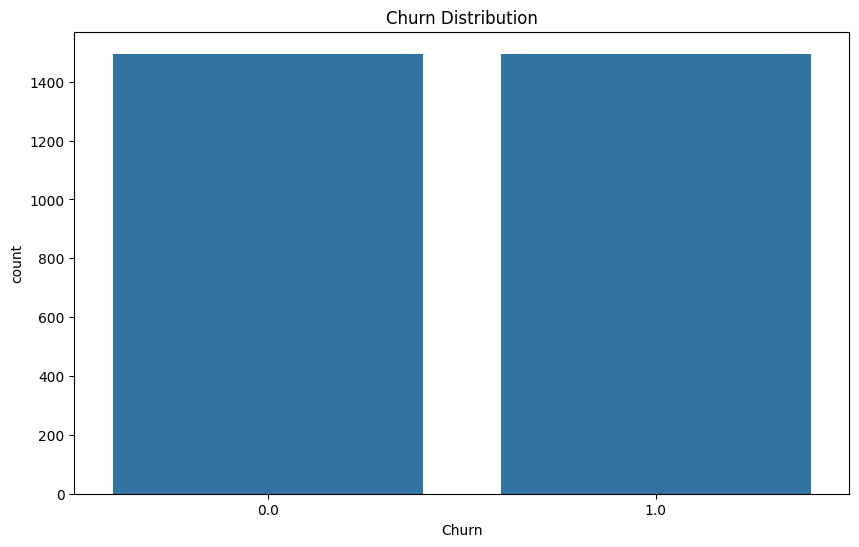

In [19]:
# Sampling untuk menangani Class Imbalance
from imblearn.over_sampling import SMOTE,SMOTEN,RandomOverSampler,ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

sampling_method = RandomUnderSampler(sampling_strategy=1.0,random_state=random_state)

X_sampled,y_sampled=sampling_method.fit_resample(encoded_df,y_train)
sampled_df = pd.concat([
    pd.DataFrame(X_sampled, columns=encoded_df.columns),
    pd.Series(y_sampled.values, name='Churn')
], axis=1)
print(y_sampled.value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=sampled_df)
plt.title('Churn Distribution')
plt.show()

# Build Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import joblib
import os

os.makedirs('models', exist_ok=True)

Hyperparameter & Classifier Tuning

In [21]:
# 3 Skema model yang akan diuji: Random Forest, SVM, dan XGBoost
classifiers = {
    'rf': RandomForestClassifier(random_state=random_state),
    'svm': SVC(probability=True, random_state=random_state),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)
}

# Parameter untuk setiap model
param_grid = [
    {
        'clf': [classifiers['rf']],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__bootstrap': [True, False],
        'clf__class_weight': ['balanced', {0: 1, 1: 2}, {0: 2, 1: 1}]
    },
    {
        'clf': [classifiers['svm']],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'clf': [classifiers['xgb']],
        'clf__max_depth': [3, 6],
        'clf__learning_rate': [0.05, 0.1],
        'clf__subsample': [0.7, 0.8],
        'clf__colsample_bytree': [0.7, 0.8],
        'clf__reg_alpha': [0, 0.1],
        'clf__reg_lambda': [1, 2] 
    }
]

pipeline = Pipeline([
    ('clf', classifiers['rf'])
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_sampled, y_sampled)

print("Best Estimator:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

os.makedirs('models', exist_ok=True)
joblib.dump(grid_search.best_estimator_, 'models/best_model.pkl')
joblib.dump(grid_search, 'models/grid_search.pkl')

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best Estimator: Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.7, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing

['models/grid_search.pkl']

In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Load pipeline
best_pipeline = joblib.load('models/best_model.pkl')
gs = joblib.load("models/grid_search.pkl")

if isinstance(best_pipeline.named_steps['clf'], XGBClassifier):
    model = best_pipeline.named_steps['clf']

y_train_pred = model.predict(X_sampled)
y_pred = model.predict(X_test)

print("=== MODEL ORIGINAL ===")
print(f"Train Accuracy: {accuracy_score(y_sampled, y_train_pred):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
mean_cv_score = gs.cv_results_['mean_test_score'][gs.best_index_]
std_cv_score = gs.cv_results_['std_test_score'][gs.best_index_]

print(f"Cross Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== MODEL ORIGINAL ===
Train Accuracy: 0.7993
Test Accuracy:  0.7306
Cross Validation Accuracy: 0.7699 ± 0.0379

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



In [43]:
importances_rf = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_sampled.columns,
    'importance': importances_rf
}).sort_values('importance', ascending=False)

=== THRESHOLD EVALUATION RESULTS ===
   Threshold  Num_Features  Test_Accuracy  CV_Accuracy_Mean  CV_Accuracy_Std
0      0.005            36       0.722814          0.741137         0.032051
1      0.010            20       0.716418          0.733110         0.027368
2      0.015            12       0.700782          0.737793         0.031167
3      0.020             9       0.706468          0.733445         0.031447
4      0.025             9       0.706468          0.733445         0.031447
5      0.030             6       0.729922          0.752174         0.030302


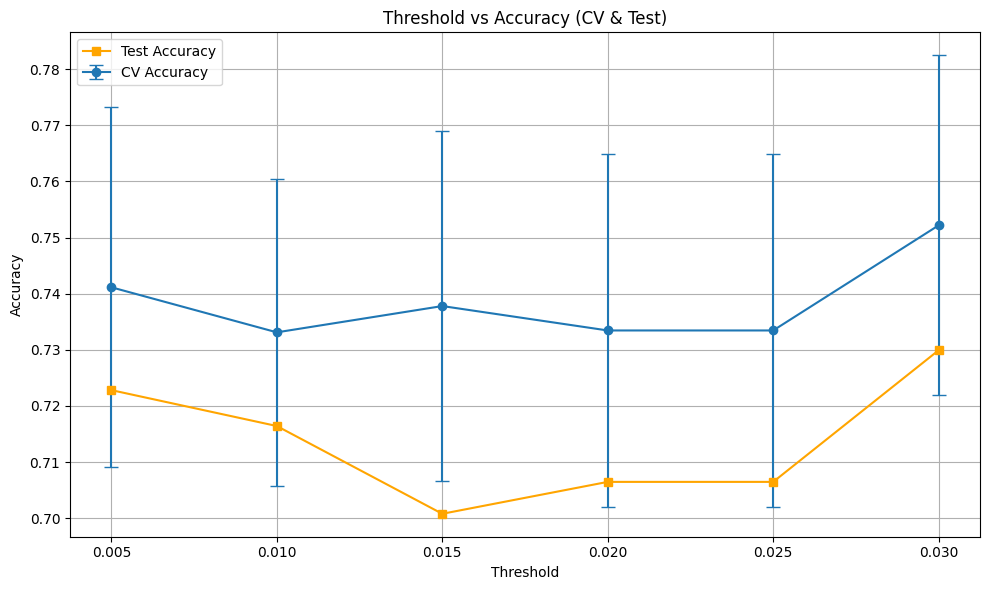

In [44]:
thresholds = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]

results = []

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
best_params = joblib.load('models/grid_search.pkl').best_params_
for t in thresholds:
    selected = importance_df[importance_df['importance'] >= t]['feature']
    if len(selected) < 2:
        continue

    X_train_sel = X_sampled[selected]
    X_test_sel = X_test[selected]

    model_thresh = XGBClassifier(**best_params)

    model_thresh.fit(X_train_sel, y_sampled)
    y_pred_sel = model_thresh.predict(X_test_sel)
    test_acc = accuracy_score(y_test, y_pred_sel)

    cv_scores = cross_val_score(model_thresh, X_train_sel, y_sampled, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results.append({
        'Threshold': t,
        'Num_Features': len(selected),
        'Test_Accuracy': test_acc,
        'CV_Accuracy_Mean': cv_mean,
        'CV_Accuracy_Std': cv_std
    })

results_df = pd.DataFrame(results)

print("=== THRESHOLD EVALUATION RESULTS ===")
print(results_df)

plt.figure(figsize=(10, 6))
plt.errorbar(results_df['Threshold'], results_df['CV_Accuracy_Mean'],
             yerr=results_df['CV_Accuracy_Std'], fmt='-o', capsize=5, label='CV Accuracy')
plt.plot(results_df['Threshold'], results_df['Test_Accuracy'], '-s', label='Test Accuracy', color='orange')
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Threshold vs Accuracy (CV & Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

=== FEATURE IMPORTANCE ANALYSIS ===

Features with importance >= 0.03: 6
Features to drop: 39
Important Features: 
                             feature  importance
32      cat__Contract_Month-to-month    0.380623
14            cat__OnlineSecurity_No    0.069000
12  cat__InternetService_Fiber optic    0.058375
23               cat__TechSupport_No    0.056277
11          cat__InternetService_DSL    0.044389
34            cat__Contract_Two year    0.038525

Threshold: 0.03
Original features: 45
Selected features: 6
=== RETRAINING MODEL SETELAH FEATURE SELECTION ===
Train Accuracy: 0.7522
Test Accuracy:  0.7299
Cross Validation Accuracy: 0.7522 ± 0.0303

Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.49      0.74      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78   

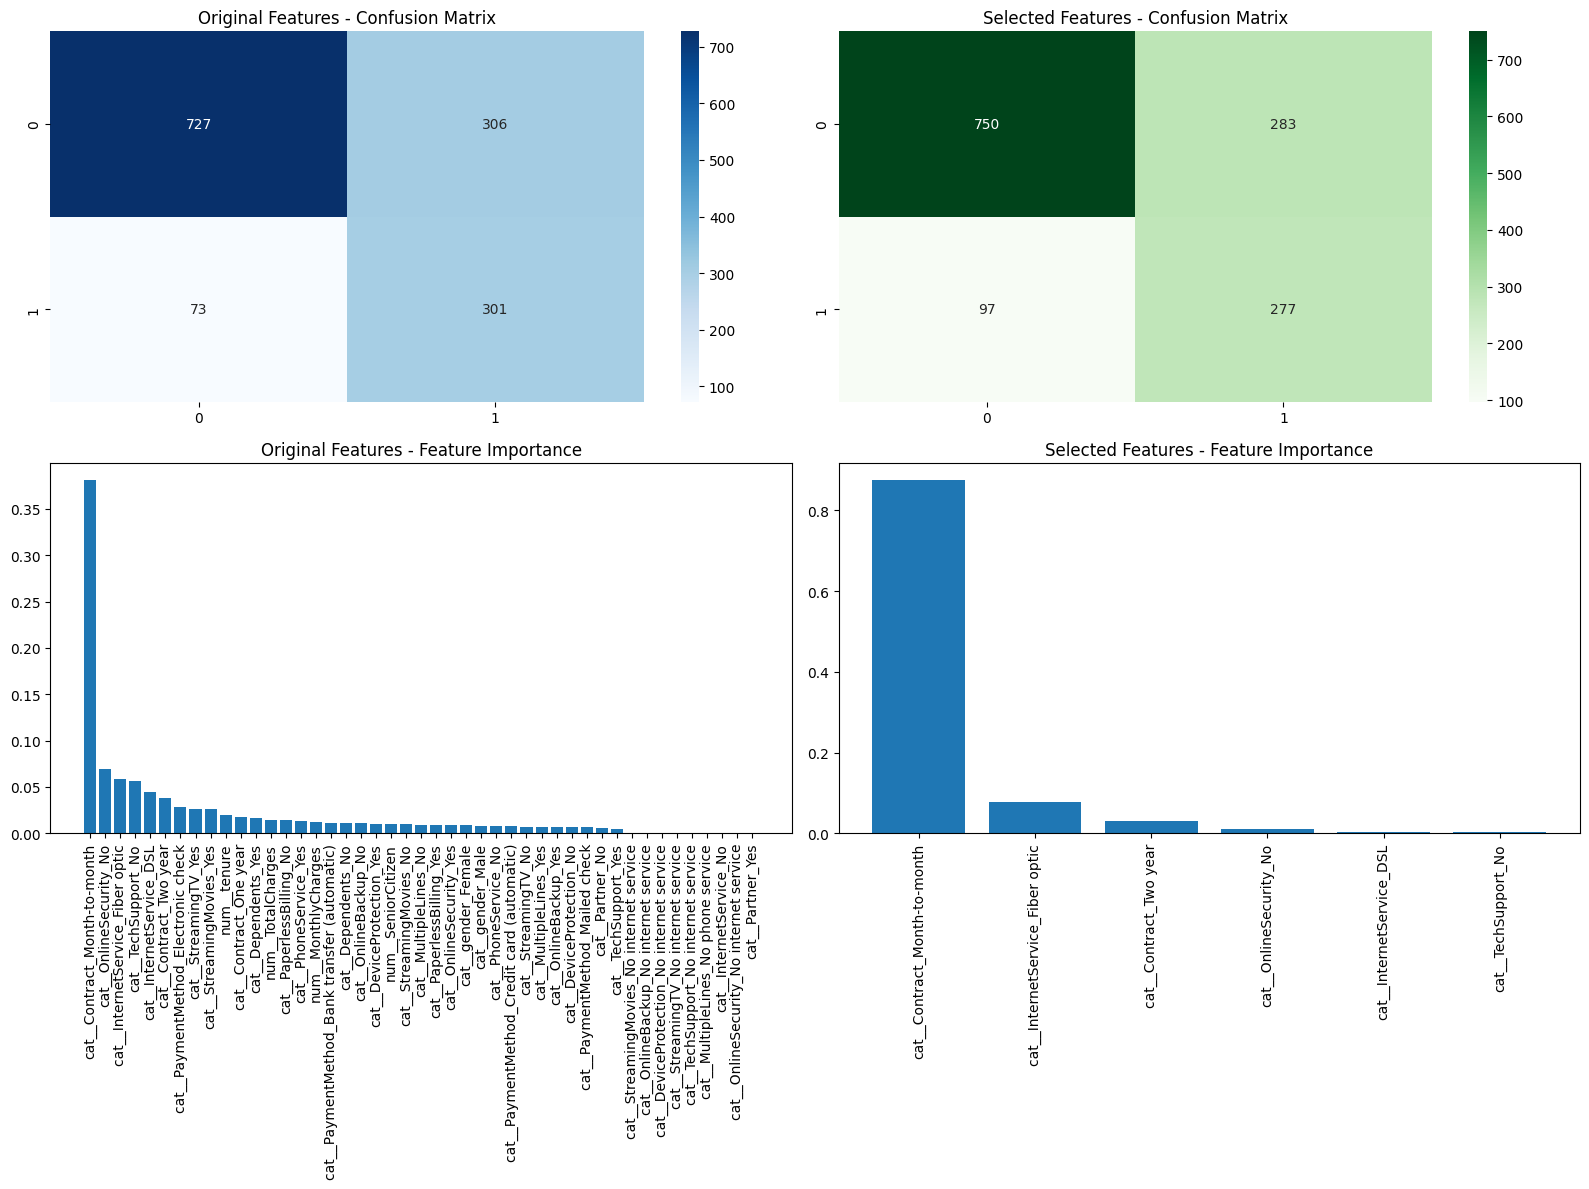


=== SUMMARY ===
Original Features Model Accuracy: 0.7306
Selected Features Model Accuracy: 0.7299
Feature reduction: 45 -> 6 (86.7% reduction)


In [49]:
print("=== FEATURE IMPORTANCE ANALYSIS ===")

threshold = 0.03
important_features = importance_df[importance_df['importance'] >= threshold]['feature'].tolist()

print(f"\nFeatures with importance >= {threshold}: {len(important_features)}")
print(f"Features to drop: {len(X_sampled.columns) - len(important_features)}")
print(f"Important Features: \n{importance_df[importance_df['importance'] >= threshold]}")

X_train_selected = X_sampled[important_features]
X_test_selected = X_test[important_features]

print(f'\nThreshold: {threshold}')
print(f"Original features: {X_sampled.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

print("=== RETRAINING MODEL SETELAH FEATURE SELECTION ===")
best_params = joblib.load('models/grid_search.pkl').best_params_
model_selected = XGBClassifier(**best_params)

model_selected.fit(X_train_selected, y_sampled)

y_train_pred_selected = model_selected.predict(X_train_selected)
y_pred_selected = model_selected.predict(X_test_selected)

train_accuracy_selected = accuracy_score(y_sampled, y_train_pred_selected)
test_accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Train Accuracy: {train_accuracy_selected:.4f}")
print(f"Test Accuracy:  {test_accuracy_selected:.4f}")

# Cross Validation untuk model baru
if 'X_sampled' in locals() and 'y_sampled' in locals():
    X_sampled_selected = X_sampled[important_features]
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores_selected = cross_val_score(model_selected, X_sampled_selected, y_sampled, cv=skf, scoring='accuracy')
    print(f"Cross Validation Accuracy: {cv_scores_selected.mean():.4f} ± {cv_scores_selected.std():.4f}")

print("\nClassification Report (Selected Features):")
print(classification_report(y_test, y_pred_selected))

# Plot 2 x 2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confusion Matrix - Original Model
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Original Features - Confusion Matrix')

# Confusion Matrix - Selected Features Model
sns.heatmap(confusion_matrix(y_test, y_pred_selected), annot=True, fmt='d', cmap='Greens', ax=axes[0,1])
axes[0,1].set_title('Selected Features - Confusion Matrix')

importances_rf = model.feature_importances_

# Feature Importance - Original Model 
sorted_idx = np.argsort(importances_rf)[::-1]
sorted_importances = importances_rf[sorted_idx]
sorted_features = X_sampled.columns[sorted_idx]

axes[1, 0].bar(range(len(sorted_idx)), sorted_importances, tick_label=sorted_features)
axes[1, 0].set_xticks(range(len(sorted_idx)))
axes[1, 0].set_xticklabels(sorted_features, rotation=90)
axes[1, 0].set_title('Original Features - Feature Importance')

# Feature Importance - Selected Features Model
importances_selected = model_selected.feature_importances_
sorted_idx_selected = np.argsort(importances_selected)[::-1]
sorted_features_selected = [important_features[i] for i in sorted_idx_selected]

axes[1, 1].bar(range(len(importances_selected)), importances_selected[sorted_idx_selected],
               tick_label=sorted_features_selected)
axes[1, 1].set_xticks(range(len(importances_selected)))
axes[1, 1].set_xticklabels(sorted_features_selected, rotation=90)
axes[1, 1].set_title('Selected Features - Feature Importance')

plt.tight_layout()
plt.show()

# Summary Model
print(f"\n=== SUMMARY ===")
print(f"Original Features Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Selected Features Model Accuracy: {accuracy_score(y_test, y_pred_selected):.4f}")
print(f"Feature reduction: {X_sampled.shape[1]} -> {X_train_selected.shape[1]} ({((X_sampled.shape[1] - X_train_selected.shape[1]) / X_sampled.shape[1] * 100):.1f}% reduction)")

# Save model baru (jika performa lebih bagus)
if test_accuracy_selected >= accuracy_score(y_test, y_pred) * 0.95:
    joblib.dump((model_selected, important_features), "models/best_model_selected_features.pkl")
